In [3]:
import os
from Data_Combain_class import Data_Combain
# 导入自定义的Data_Combain_class类
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import datetime 
%matplotlib inline
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
#正常显示画图时出现的中文和负号

In [4]:
# 代码示例
# 取一定时间内的数据，并对数据进行筛选、缺失值填充、归一化等操作。
# 其中的因子有
# ['close','shift_predict_value', 'ep', 'ep_cut', 'bp', 'sp', 'dp', 'g_pe', 
# 'netprofit_yoy', 'eps_yoy', 'roe', 'roa',
# 'total_assets', 'total_liabilities', 'equity', 'current_ratio', 'grossprofit_margin', 'netprofit_margin',
# 'debt_ratio', 'debt_to_equity_ratio',
# 'ma3', 'ma6', 'ma9', 'ma12', 'momentum', 'volatility', 'rsi','ma3_cross_ma9', 'ma3_cross_ma12']
# 预测值为predict_value、股票名为ts_code、时间为trade_date

# 定义起始日期和结束日期
start_date = '20130131'
end_date = '20230831'

# 创建Data_Combain对象，并使用起始日期和结束日期初始化
my_Data_Combain = Data_Combain(start_date, end_date)

# 第一次combain时修正trade_time
data = my_Data_Combain.first_combain()

# 定义因子名称列表
factor_name = ['close', 'shift_predict_value','ep', 'ep_cut', 'bp', 'sp', 'dp', 'g_pe', 
                'netprofit_yoy', 'eps_yoy', 'roe', 'roa',
                'total_assets', 'total_liabilities', 'equity', 'current_ratio', 'grossprofit_margin', 'netprofit_margin',
                'debt_ratio', 
                'ma3', 'ma6', 'ma9', 'ma12', 'momentum', 'volatility', 'rsi']



In [5]:
my_Data_Combain = Data_Combain(start_date, end_date)
data = my_Data_Combain.combain()

In [6]:
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
trade_date,30188,2018-10-26 04:59:28.040280832,2013-01-31 00:00:00,2016-03-31 00:00:00,2019-01-31 00:00:00,2021-06-30 00:00:00,2023-08-31 00:00:00,NaN
close,30188.0,-0.0,-0.408156,-0.324264,-0.225118,-0.018751,24.45586,1.000017
shift_predict_value,30188.0,0.0,-5.697223,-0.511628,-0.086564,0.432654,33.612191,1.000017
ep,30188.0,-0.0,-1.03011,-0.697674,-0.340055,0.353801,12.796147,1.000017
ep_cut,30188.0,-0.0,-1.054611,-0.695732,-0.315546,0.339151,12.377392,1.000017
bp,30188.0,0.0,-1.160011,-0.744928,-0.295717,0.470987,12.471942,1.000017
sp,30188.0,0.0,-0.662451,-0.526669,-0.311983,0.067888,9.728662,1.000017
dp,30188.0,-0.0,-0.867004,-0.704058,-0.331524,0.348092,15.755732,1.000017
g_pe,30188.0,-0.0,-19.333542,-0.0316,-0.03114,-0.029214,102.190377,1.000017
netprofit_yoy,30188.0,0.0,-20.451935,-0.118935,-0.08139,-0.028505,39.784184,1.000017


In [7]:
def disassemble(data, start_date, mid_date, end_date):
    """
    将给定日期范围内的数据拆分成训练集和测试集。

    参数：
    - data: 包含交易数据的DataFrame
    - start_date: 开始日期，格式为"YYYYMMDD"的字符串
    - mid_date: 中间日期，格式为"YYYYMMDD"的字符串
    - end_date: 结束日期，格式为"YYYYMMDD"的字符串

    返回：
    - train_data: 训练集数据，包含指定日期范围内的数据
    - test_data: 测试集数据，包含指定日期范围内的数据
    """

    date_format = "%Y%m%d"

    # 将日期字符串转换为datetime对象
    if isinstance(start_date, str):
        start_date = datetime.datetime.strptime(start_date, date_format)
        mid_date = datetime.datetime.strptime(mid_date, date_format)
        end_date = datetime.datetime.strptime(end_date, date_format)

    # 将交易日期转换为日期对象
    data['trade_date'] = pd.to_datetime(data['trade_date'], format='%Y-%m-%d')

    # 根据给定日期范围筛选数据作为训练集和测试集
    train_data = data[(data['trade_date'] >= start_date) & (data['trade_date'] <= mid_date)]
    test_data = data[(data['trade_date'] > mid_date) & (data['trade_date'] <= end_date)]

    # 重置索引
    train_data = train_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)

    return train_data, test_data


In [8]:
# 示例代码
mid_date = '20210131'
train_data, test_data = disassemble(data, start_date, mid_date, end_date)

In [9]:
X_train = train_data[factor_name]
Y_train = train_data['predict_value']
X_test = test_data[factor_name]
Y_test = test_data['predict_value']

In [10]:
Y_train

0        0.759481
1        0.266923
2        0.638426
3       -0.196703
4        1.276880
           ...   
21094    0.000630
21095    1.033097
21096   -0.050771
21097   -0.103973
21098    0.246016
Name: predict_value, Length: 21099, dtype: float64

In [11]:
Y_test

0      -0.496683
1      -0.553104
2      -0.626921
3       0.310073
4      -0.329174
          ...   
9084   -0.283662
9085    0.015417
9086   -0.810520
9087   -0.449520
9088   -0.066188
Name: predict_value, Length: 9089, dtype: float64

# model

In [12]:
import os
from Data_Combain_class import Data_Combain
# 导入自定义的Data_Combain_class类
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import xgboost
from datetime import datetime 
%matplotlib inline
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
#正常显示画图时出现的中文和负号

In [13]:
factor_name = ['close', 'shift_predict_value','ep', 'ep_cut', 'bp', 'sp', 'dp', 'g_pe', 
                'netprofit_yoy', 'eps_yoy', 'roe', 'roa',
                'total_assets', 'total_liabilities', 'equity', 'current_ratio', 'grossprofit_margin', 'netprofit_margin',
                'debt_ratio', 
                'ma3', 'ma6', 'ma9', 'ma12', 'momentum', 'volatility', 'rsi']

In [14]:
import datetime
import pandas as pd

def disassemble(data, start_date, mid_date, end_date):
    """
    将给定日期范围内的数据拆分成训练集和测试集。

    参数：
    - data: 包含交易数据的DataFrame
    - start_date: 开始日期，格式为"YYYYMMDD"的字符串
    - mid_date: 中间日期，格式为"YYYYMMDD"的字符串
    - end_date: 结束日期，格式为"YYYYMMDD"的字符串

    返回：
    - train_data: 训练集数据，包含指定日期范围内的数据
    - test_data: 测试集数据，包含指定日期范围内的数据
    """

    date_format = "%Y%m%d"

    # 将日期字符串转换为datetime对象
    if isinstance(start_date, str):
        start_date = datetime.datetime.strptime(start_date, date_format)
        mid_date = datetime.datetime.strptime(mid_date, date_format)
        end_date = datetime.datetime.strptime(end_date, date_format)

    # 将交易日期转换为日期对象
    data['trade_date'] = pd.to_datetime(data['trade_date'], format='%Y-%m-%d')

    # 根据给定日期范围筛选数据作为训练集和测试集
    train_data = data[(data['trade_date'] >= start_date) & (data['trade_date'] <= mid_date)]
    test_data = data[(data['trade_date'] > mid_date) & (data['trade_date'] <= end_date)]

    # 重置索引
    train_data = train_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)

    return train_data, test_data

In [15]:
start_date = '20130131'
end_date = '20230831'
mid_date = '20210131'
date_format = "%Y%m%d"
start_date = datetime.datetime.strptime(start_date, date_format)
mid_date = datetime.datetime.strptime(mid_date, date_format)
end_date = datetime.datetime.strptime(end_date, date_format)

In [16]:
# 创建Data_Combain对象，并使用给定的起始日期和结束日期合并数据
my_Data_Combain = Data_Combain(start_date, end_date)
data = my_Data_Combain.combain()

# 使用给定的训练集和测试集日期范围，将数据拆分为训练集和测试集
train_data, test_data = disassemble(data, start_date, mid_date, end_date)

# 获取训练集和测试集中的因子和预测值
X_train = train_data[factor_name]
Y_train = train_data['predict_value']
X_test = test_data[factor_name]
Y_test = test_data['predict_value']

Y_test

0      -0.496683
1      -0.553104
2      -0.626921
3       0.310073
4      -0.329174
          ...   
9084   -0.283662
9085    0.015417
9086   -0.810520
9087   -0.449520
9088   -0.066188
Name: predict_value, Length: 9089, dtype: float64

In [17]:
# 使用pd.date_range函数创建一个日期范围，起始日期为mid_date，结束日期为end_date，频率为每月（'M'）
datetime_range = pd.date_range(start=mid_date, end=end_date, freq='M')

datetime_range

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31'],
              dtype='datetime64[ns]', freq='M')

In [18]:
def my_xgboost(X_train, Y_train, X_test):
    model_xgboost = xgboost.XGBRegressor(n_estimators=120, learning_rate=0.5, max_depth=7, random_state=48)
    model_xgboost.fit(X_train,Y_train)
    pred_xgboost=model_xgboost.predict(X_test)
    return pred_xgboost

In [19]:
pred_xgboost=np.array([])# 存储结果
for i in range(len(datetime_range)-1):
    print('---------'+str(datetime_range[i])+'---------')
    my_Data_Combain = Data_Combain(start_date, datetime_range[i+1])
    temp_data = my_Data_Combain.combain()
    temp_train_data, temp_test_data = disassemble(temp_data, start_date, datetime_range[i], datetime_range[i+1])
    if len(temp_test_data) == 0:
        print('------------------'+'空组'+'----------------------')
        continue
    temp_X_train = temp_train_data[factor_name]
    temp_Y_train = temp_train_data['predict_value']
    temp_X_test = temp_test_data[factor_name]
    temp_Y_test = temp_test_data['predict_value']
    out_sample_pred = my_xgboost(temp_X_train, temp_Y_train, temp_X_test)
    pred_xgboost = np.append(pred_xgboost, out_sample_pred) # 考虑一步滞后预测

---------2021-01-31 00:00:00---------
---------2021-02-28 00:00:00---------
---------2021-03-31 00:00:00---------
---------2021-04-30 00:00:00---------
---------2021-05-31 00:00:00---------
---------2021-06-30 00:00:00---------
---------2021-07-31 00:00:00---------
---------2021-08-31 00:00:00---------
---------2021-09-30 00:00:00---------
---------2021-10-31 00:00:00---------
---------2021-11-30 00:00:00---------
---------2021-12-31 00:00:00---------
------------------空组----------------------
---------2022-01-31 00:00:00---------
---------2022-02-28 00:00:00---------
---------2022-03-31 00:00:00---------
------------------空组----------------------
---------2022-04-30 00:00:00---------
---------2022-05-31 00:00:00---------
---------2022-06-30 00:00:00---------
------------------空组----------------------
---------2022-07-31 00:00:00---------
---------2022-08-31 00:00:00---------
---------2022-09-30 00:00:00---------
---------2022-10-31 00:00:00---------
---------2022-11-30 00:00:00-------

pred_xgboost 0       1.464002
1       0.127748
2      -0.580555
3       0.420353
4      -0.476871
          ...   
9084    0.324935
9085   -0.249130
9086    0.370139
9087    0.006321
9088   -0.510940
Name: 1, Length: 9089, dtype: float64


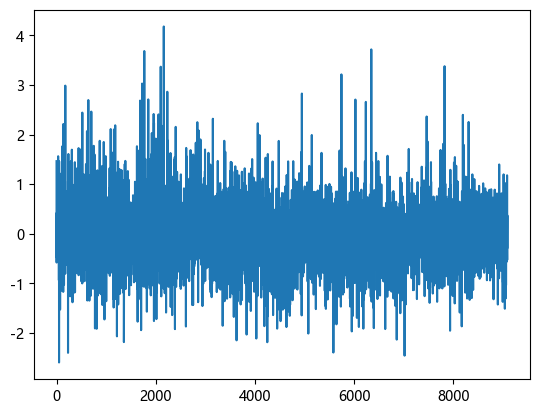

In [20]:
pred_xgboost=pd.DataFrame(pred_xgboost)
pred_xgboost=pred_xgboost.rename(columns={0:1})
pred_xgboost=pred_xgboost[1]
pred_xgboost.plot()
print('pred_xgboost',pred_xgboost)

In [21]:
#MSFE
print('pred_xgboost',pred_xgboost)
MSFE_xgboost=np.mean((Y_test-pred_xgboost)**2)
print('MSFE_xgboost',MSFE_xgboost)
sum_num = 0
for i in range(len(pred_xgboost)):
    if pred_xgboost[i] * Y_test[i] >= 0:
        sum_num += 1
print(len(pred_xgboost))
print(sum_num)


pred_xgboost 0       1.464002
1       0.127748
2      -0.580555
3       0.420353
4      -0.476871
          ...   
9084    0.324935
9085   -0.249130
9086    0.370139
9087    0.006321
9088   -0.510940
Name: 1, Length: 9089, dtype: float64
MSFE_xgboost 1.1617736838334392
9089
4590


## model

In [22]:
from sklearn import svm
def my_svr(X_train, Y_train, X_test):
    classifier=svm.SVR()
    classifier.fit(X_train,Y_train)
    pred_svr=classifier.predict(X_test)
    return pred_svr

In [23]:
pred_svr=np.array([])# 存储结果
for i in range(len(datetime_range)-1):
    print('---------'+str(datetime_range[i])+'---------')
    my_Data_Combain = Data_Combain(start_date, datetime_range[i+1])
    temp_data = my_Data_Combain.combain()
    temp_train_data, temp_test_data = disassemble(temp_data, start_date, datetime_range[i], datetime_range[i+1])
    if len(temp_test_data) == 0:
        continue
    temp_X_train = temp_train_data[factor_name]
    temp_Y_train = temp_train_data['predict_value']
    temp_X_test = temp_test_data[factor_name]
    temp_Y_test = temp_test_data['predict_value']
    out_sample_pred = my_svr(temp_X_train, temp_Y_train, temp_X_test)
    pred_svr = np.append(pred_svr, out_sample_pred) # 考虑一步滞后预测

---------2021-01-31 00:00:00---------
---------2021-02-28 00:00:00---------
---------2021-03-31 00:00:00---------
---------2021-04-30 00:00:00---------
---------2021-05-31 00:00:00---------
---------2021-06-30 00:00:00---------
---------2021-07-31 00:00:00---------
---------2021-08-31 00:00:00---------
---------2021-09-30 00:00:00---------
---------2021-10-31 00:00:00---------
---------2021-11-30 00:00:00---------
---------2021-12-31 00:00:00---------
---------2022-01-31 00:00:00---------
---------2022-02-28 00:00:00---------
---------2022-03-31 00:00:00---------
---------2022-04-30 00:00:00---------
---------2022-05-31 00:00:00---------
---------2022-06-30 00:00:00---------
---------2022-07-31 00:00:00---------
---------2022-08-31 00:00:00---------
---------2022-09-30 00:00:00---------
---------2022-10-31 00:00:00---------
---------2022-11-30 00:00:00---------
---------2022-12-31 00:00:00---------
---------2023-01-31 00:00:00---------
---------2023-02-28 00:00:00---------
---------202

pred_svr 0      -0.103515
1       0.107261
2      -0.266370
3      -0.080360
4      -0.246932
          ...   
9084   -0.151900
9085   -0.124181
9086    0.001466
9087   -0.084073
9088   -0.019544
Name: 1, Length: 9089, dtype: float64


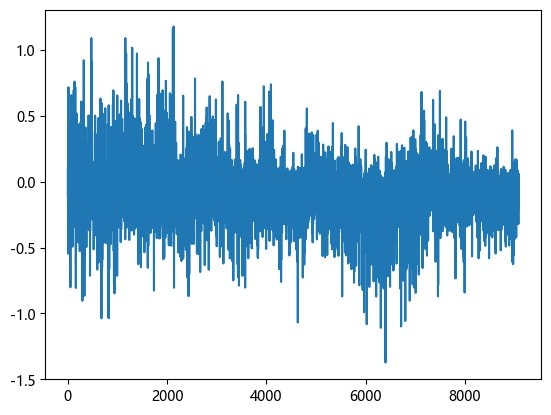

In [24]:
pred_svr=pd.DataFrame(pred_svr)
pred_svr=pred_svr.rename(columns={0:1})
pred_svr=pred_svr[1]
pred_svr.plot()
print('pred_svr',pred_svr)

In [25]:
#MSFE
print('pred_svr',pred_svr)
MSFE_svr=np.mean((Y_test-pred_svr)**2)
print('MSFE_svr',MSFE_svr)
sum_num = 0
for i in range(len(pred_svr)):
    if pred_svr[i] * Y_test[i] >= 0:
        sum_num += 1
print(len(pred_svr))
print(sum_num)


pred_svr 0      -0.103515
1       0.107261
2      -0.266370
3      -0.080360
4      -0.246932
          ...   
9084   -0.151900
9085   -0.124181
9086    0.001466
9087   -0.084073
9088   -0.019544
Name: 1, Length: 9089, dtype: float64
MSFE_svr 0.9186410726612155
9089
4973


In [26]:
pred_all = (pred_svr + pred_xgboost)/2
pred_all[pred_all<0] = 0

In [27]:
# 合并因子数据
trade_info = pd.DataFrame({
    'trade_date': test_data['trade_date'],
    'ts_code': test_data['ts_code'],
    'weight': pred_all
})
# 保存因子数据
file_name = f'trade_info.csv'
trade_info.to_csv(file_name, index=False)
print(f'Saved trade_info data for trade_info to {file_name}')

Saved trade_info data for trade_info to trade_info.csv


In [28]:
start_date = '20130131'
end_date = '20230831'
mid_date = '20210131'
date_format = "%Y%m%d"
start_date = datetime.datetime.strptime(start_date, date_format)
mid_date = datetime.datetime.strptime(mid_date, date_format)
end_date = datetime.datetime.strptime(end_date, date_format)

In [29]:
datetime_range = pd.date_range(start = mid_date, end = end_date, freq='M')
datetime_range

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31'],
              dtype='datetime64[ns]', freq='M')

In [30]:
# 导入pandas库
import pandas as pd

def calculate_weight(data, start_date, end_date):
    date_format = "%Y%m%d"
    # 如果起始日期和结束日期是字符串类型，则将其转换为时间戳类型
    if isinstance(start_date, str):
        start_date = pd.Timestamp.strptime(start_date, date_format)
        end_date = pd.Timestamp.strptime(end_date, date_format)
    # 将交易日期列转换为datetime类型
    data['trade_date'] = pd.to_datetime(data['trade_date'], format='%Y-%m-%d')
    # 生成包含给定日期范围内每天的DatetimeIndex对象
    date_range = pd.date_range(start_date, end_date, freq='D')
    # 根据给定日期范围筛选数据
    calculate_data = data[data['trade_date'].isin(date_range)].copy()
    # 计算选中日期范围内的权重总和
    calculate_data_sum = calculate_data['weight'].sum()
    print(calculate_data_sum)
    # 如果总和不为0，则将选中日期范围内的每个权重都除以总和，使它们加起来等于1
    if calculate_data_sum != 0:
        data.loc[data['trade_date'].isin(date_range), 'weight'] = calculate_data['weight'] / calculate_data_sum
    # 如果总和为0，则将所有选中日期范围内的权重设置为0，以避免出现NaN或无穷大的情况
    else:
        data.loc[data['trade_date'].isin(date_range), 'weight'] = 0 
    return data



In [31]:
trade_info

,trade_date,ts_code,weight
0,2021-02-01,300628.SZ,0.680244
1,2021-02-01,601788.SH,0.117505
2,2021-02-01,601877.SH,0.000000
3,2021-02-01,000617.SZ,0.169997
4,2021-02-01,600011.SH,0.000000
...,...,...,...
9084,2023-08-31,688303.SH,0.086518
9085,2023-08-31,601398.SH,0.000000
9086,2023-08-31,600570.SH,0.185803
9087,2023-08-31,002600.SZ,0.000000


In [32]:
for i in range(len(datetime_range)-1):
    print('---------'+str(datetime_range[i])+'---------')
    trade_info = calculate_weight(trade_info, datetime_range[i], datetime_range[i+1])

---------2021-01-31 00:00:00---------
34.513243870565994
---------2021-02-28 00:00:00---------
51.88306350256916
---------2021-03-31 00:00:00---------
24.75104317414015
---------2021-04-30 00:00:00---------
35.15621405287095
---------2021-05-31 00:00:00---------
23.738226232827298
---------2021-06-30 00:00:00---------
1.2531887323739785
---------2021-07-31 00:00:00---------
73.89046869664752
---------2021-08-31 00:00:00---------
27.606641729077754
---------2021-09-30 00:00:00---------
1.1539593721408266
---------2021-10-31 00:00:00---------
58.76165950987251
---------2021-11-30 00:00:00---------
21.563955965080773
---------2021-12-31 00:00:00---------
0.9737439510543349
---------2022-01-31 00:00:00---------
42.41822112204024
---------2022-02-28 00:00:00---------
33.53713526536298
---------2022-03-31 00:00:00---------
0.9850317560824049
---------2022-04-30 00:00:00---------
20.85157650358922
---------2022-05-31 00:00:00---------
23.708573578592805
---------2022-06-30 00:00:00---------
0

In [33]:
file_name = f'trade_info.csv'
trade_info.to_csv(file_name, index=False)
print(f'Saved trade_info data for trade_info to {file_name}')

Saved trade_info data for trade_info to trade_info.csv


In [34]:
daily_price = pd.read_csv("./daily_price.csv", parse_dates=['datetime'])
daily_price_datetime = pd.to_datetime(daily_price['datetime'].unique(), format='%Y-%m-%d', unit='D')

In [35]:
import datetime

# 将trade_info中的交易日期列转换为datetime类型，并指定格式为'%Y-%m-%d'，单位为'D'
trade_date_change = pd.to_datetime(trade_info['trade_date'], format='%Y-%m-%d', unit='D')

# 重置索引，以便后续操作
trade_date_change = trade_date_change.reset_index(drop=True)

# 初始化两个空列表，用于存储交易日期的变化情况
trade_date_change_list_1 = []
trade_date_change_list_2 = []

# 遍历交易日期列表
for i in range(len(trade_date_change)):
    j = 0
    # 在交易日期变化列表1中查找是否存在和当前交易日期相等的日期
    while(j < len(trade_date_change_list_1)):
        if trade_date_change[i] == trade_date_change_list_1[j]:
            # 如果找到相等的日期，则将当前交易日期修改为对应的变化日期
            trade_date_change.loc[i] = trade_date_change_list_2[j]
            break
        j += 1
    # 如果在列表1中没有找到相等的日期，并且当前交易日期不在daily_price_datetime中
    if j == len(trade_date_change_list_1) and trade_date_change[i] not in daily_price_datetime:
        # 将当前交易日期加入列表1中
        trade_date_change_list_1.append(trade_date_change[i])
        # 不断向前遍历日期，直到找到一个在daily_price_datetime中的日期
        while(trade_date_change[i] not in daily_price_datetime):
            trade_date_change[i] = trade_date_change[i] - datetime.timedelta(days=1)
        # 将找到的日期添加到列表2中
        trade_date_change_list_2.append(trade_date_change[i])


In [36]:
trade_info['trade_date'] = trade_date_change
trade_info.drop(trade_info.loc[trade_info['weight'] == 0].index, inplace=True)

In [37]:
file_name = f'trade_info.csv'
trade_info.to_csv(file_name, index=False)
print(f'Saved trade_info data for trade_info to {file_name}')

Saved trade_info data for trade_info to trade_info.csv
